In [1]:
'''
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class VideoFrameGenerator(tf.keras.utils.Sequence):
    def __init__(self, directory, batch_size, n_frames, input_shape, shuffle=True, rescale=1./255):
        self.directory = directory
        self.batch_size = batch_size
        self.n_frames = n_frames
        self.input_shape = input_shape
        self.shuffle = shuffle
        self.rescale = rescale
        self.video_labels = {'FAKE': 0, 'REAL': 1}
        self.videos, self.labels = self._load_video_paths()
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.videos) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        videos_temp = [self.videos[k] for k in indexes]
        X, y = self._generate_data(videos_temp)
        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.videos))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def _load_video_paths(self):
        videos = []
        labels = []
        for label in ['FAKE', 'REAL']:
            videos_dir = os.path.join(self.directory, label)
            for video in os.listdir(videos_dir):
                video_dir = os.path.join(videos_dir, video)
                if os.path.isdir(video_dir):
                    videos.append(video_dir)
                    labels.append(self.video_labels[label])
        return videos, labels

    def _generate_data(self, videos_temp):
        X = np.empty((self.batch_size, self.n_frames, *self.input_shape))
        y = np.empty((self.batch_size), dtype=int)

        for i, video_dir in enumerate(videos_temp):
            frames = sorted(os.listdir(video_dir))[:self.n_frames]
            X[i,] = np.array([self._process_frame(os.path.join(video_dir, frame)) for frame in frames])
            y[i] = self.labels[self.videos.index(video_dir)]

        return X, y

    def _process_frame(self, frame_path):
        frame = load_img(frame_path, target_size=self.input_shape[:2])
        frame = img_to_array(frame)
        frame = frame * self.rescale
        return frame

    def calculate_samples_per_video(self):
        samples_per_video = {}
        for video_dir in self.videos:
            total_frames = len(os.listdir(video_dir))
            samples = total_frames // self.n_frames
            samples_per_video[os.path.basename(video_dir)] = samples
        return samples_per_video

# Example usage:
train_directory = '../biometric_project/data/3DCNN_input/train/'
val_directory = '../biometric_project/data/3DCNN_input/val/'

batch_size = 1
n_frames = 300  # Number of frames to take from each video
input_shape = (224, 224, 3)  # Shape expected by your 3D CNN model

train_generator = VideoFrameGenerator(train_directory, batch_size, n_frames, input_shape=input_shape)
val_generator = VideoFrameGenerator(val_directory, batch_size, n_frames, input_shape=input_shape)
'''

"\nimport os\nimport numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras.preprocessing.image import load_img, img_to_array\n\nclass VideoFrameGenerator(tf.keras.utils.Sequence):\n    def __init__(self, directory, batch_size, n_frames, input_shape, shuffle=True, rescale=1./255):\n        self.directory = directory\n        self.batch_size = batch_size\n        self.n_frames = n_frames\n        self.input_shape = input_shape\n        self.shuffle = shuffle\n        self.rescale = rescale\n        self.video_labels = {'FAKE': 0, 'REAL': 1}\n        self.videos, self.labels = self._load_video_paths()\n        self.on_epoch_end()\n\n    def __len__(self):\n        return int(np.floor(len(self.videos) / self.batch_size))\n\n    def __getitem__(self, index):\n        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]\n        videos_temp = [self.videos[k] for k in indexes]\n        X, y = self._generate_data(videos_temp)\n        return X, y\n\n    def on_epoch_en

In [2]:

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class VideoFrameGenerator(tf.keras.utils.Sequence):
    def __init__(self, directory, batch_size, n_frames, input_shape, shuffle=True, rescale=1./255):
        self.directory = directory
        self.batch_size = batch_size
        self.n_frames = n_frames
        self.input_shape = input_shape
        self.shuffle = shuffle
        self.rescale = rescale
        self.video_labels = {'FAKE': 0, 'REAL': 1}
        self.samples, self.labels = self._load_samples_and_labels()
        self.on_epoch_end()

    def _load_samples_and_labels(self):
        samples = []
        labels = []
        self.videos = []  # Initialize the videos attribute
        for label in ['FAKE', 'REAL']:
            videos_dir = os.path.join(self.directory, label)
            for video in os.listdir(videos_dir):
                video_dir = os.path.join(videos_dir, video)
                if os.path.isdir(video_dir):
                    self.videos.append(video_dir)  # Append the video directory
                    num_frames = len(os.listdir(video_dir))
                    num_samples = num_frames // self.n_frames
                    for i in range(num_samples):
                        start_frame = i * self.n_frames
                        samples.append((video_dir, start_frame))
                        labels.append(self.video_labels[label])
        return samples, labels
    
    def __len__(self):
        return int(np.ceil(len(self.samples) / self.batch_size))

    def __getitem__(self, index):
        batch_samples = self.samples[index * self.batch_size:(index + 1) * self.batch_size]
        X = np.empty((self.batch_size, self.n_frames, *self.input_shape))
        y = np.empty((self.batch_size), dtype=int)

        for i, (video_dir, start_frame) in enumerate(batch_samples):
            frames = sorted(os.listdir(video_dir))[start_frame:start_frame + self.n_frames]
            X[i,] = np.array([self._process_frame(os.path.join(video_dir, frame)) for frame in frames])
            y[i] = self.labels[index * self.batch_size + i]

        return X, y

    def _process_frame(self, frame_path):
        frame = load_img(frame_path, target_size=self.input_shape[:2])
        frame = img_to_array(frame)
        frame = frame * self.rescale
        return frame

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.samples))
        if self.shuffle:
            np.random.shuffle(self.indexes)
            self.samples = [self.samples[i] for i in self.indexes]
            self.labels = [self.labels[i] for i in self.indexes]
            
    def calculate_samples_per_video(self):
        samples_per_video = {}
        for video_dir in self.videos:
            total_frames = len(os.listdir(video_dir))
            samples = total_frames // self.n_frames
            samples_per_video[os.path.basename(video_dir)] = samples
        return samples_per_video

# Usage remains the same
train_directory = '../biometric_project/data/3DCNN_input/train/'
val_directory = '../biometric_project/data/3DCNN_input/val/'

batch_size = 10
n_frames = 30  # Number of frames to take from each video
input_shape = (224, 224, 3)  # Shape expected by your 3D CNN model

train_generator = VideoFrameGenerator(train_directory, batch_size, n_frames, input_shape=input_shape)
val_generator = VideoFrameGenerator(val_directory, batch_size, n_frames, input_shape=input_shape)



In [3]:
samples_per_video = train_generator.calculate_samples_per_video()
print(samples_per_video)

{'aagfhgtpmv': 10, 'abqwwspghj': 10, 'acifjvzvpm': 10, 'aelzhcnwgf': 10, 'aknmpoonls': 10, 'akvmwkdyuv': 10, 'akxoopqjqz': 10, 'akzbnazxtz': 10, 'aladcziidp': 10, 'alaijyygdv': 10, 'alninxcyhg': 10, 'altziddtxi': 10, 'alvgwypubw': 10, 'amaivqofda': 10, 'amowujxmzc': 10, 'aneclqfpbt': 10, 'apgjqzkoma': 10, 'apogckdfrz': 10, 'aqpnvjhuzw': 10, 'arkroixhey': 10, 'arlmiizoob': 10, 'arrhsnjqku': 10, 'asdpeebotb': 10, 'aslsvlvpth': 10, 'asvcrfdpnq': 10, 'atxvxouljq': 10, 'atyntldecu': 10, 'atzdznmder': 10, 'aufmsmnoye': 10, 'avfitoutyn': 10, 'avgiuextiz': 10, 'avnqydkqjj': 10, 'avssvvsdhz': 10, 'avywawptfc': 10, 'awhmfnnjih': 10, 'awnwkrqibf': 10, 'awukslzjra': 10, 'azsmewqghg': 10, 'bahdpoesir': 10, 'bbhtdfuqxq': 10, 'bchnbulevv': 10, 'abarnvbtwb': 10, 'aelfnikyqj': 10, 'afoovlsmtx': 10, 'anpuvshzoo': 10, 'asaxgevnnp': 10, 'atkdltyyen': 10, 'avmjormvsx': 10, 'axntxmycwd': 10, 'aybgughjxh': 10, 'aybumesmpk': 10, 'bmjzrlszhi': 10, 'bpapbctoao': 10, 'bulkxhhknf': 10, 'bwhlgysghg': 10, 'bwipwzzx

In [4]:
samples_per_video = val_generator.calculate_samples_per_video()
print(samples_per_video)

{'acqfdwsrhi': 10, 'acxnxvbsxk': 10, 'acxwigylke': 10, 'aczrgyricp': 10, 'adohikbdaz': 10, 'adylbeequz': 10, 'aettqgevhz': 10, 'aevrfsexku': 10, 'agdkmztvby': 10, 'agqphdxmwt': 10, 'ahbweevwpv': 10, 'ahdbuwqxit': 10, 'ahfazfbntc': 10, 'aipfdnwpoo': 10, 'ajwpjhrbcv': 10, 'aklqzsddfl': 10, 'aknbdpmgua': 10, 'axczxisdtb': 10, 'axoygtekut': 10, 'ayqvfdhslr': 10, 'azpuxunqyo': 10, 'ahqqqilsxt': 10, 'ajqslcypsw': 10, 'aytzyidmgs': 10, 'bddjdhzfze': 10, 'bdnaqemxmr': 10, 'beboztfcme': 10, 'bejhvclboh': 10, 'beyebyhrph': 10, 'bffwsjxghk': 10, 'bgvhtpzknn': 10, 'bgwmmujlmc': 10, 'bilnggbxgu': 10, 'efwfxwwlbw': 10, 'egghxjjmfg': 10, 'ekcrtigpab': 10, 'ellavthztb': 10, 'eqnoqyfquo': 10, 'erlvuvjsjf': 10}


In [5]:
print(len(train_generator))
print(len(val_generator))

86
39


In [6]:
print("Total number of videos:", len(train_generator.videos))
print("Batch size:", train_generator.batch_size)
print("Length of generator (number of batches):", len(train_generator))


Total number of videos: 86
Batch size: 10
Length of generator (number of batches): 86


In [7]:
print("Total number of videos:", len(val_generator.videos))
print("Batch size:", val_generator.batch_size)
print("Length of generator (number of batches):", len(val_generator))

Total number of videos: 39
Batch size: 10
Length of generator (number of batches): 39


In [8]:
'''
# Retrieve the first batch
for i in range(0,len(train_generator)):
    X_batch, y_batch = train_generator[i]
    print(y_batch)


# Print the shapes
print("Shape of X (features):", X_batch.shape)
print("Shape of y (labels):", y_batch.shape)

import matplotlib.pyplot as plt
plt.imshow(X_batch[0][0])

print(y_batch)
'''

'\n# Retrieve the first batch\nfor i in range(0,len(train_generator)):\n    X_batch, y_batch = train_generator[i]\n    print(y_batch)\n\n\n# Print the shapes\nprint("Shape of X (features):", X_batch.shape)\nprint("Shape of y (labels):", y_batch.shape)\n\nimport matplotlib.pyplot as plt\nplt.imshow(X_batch[0][0])\n\nprint(y_batch)\n'

Shape of X (features): (10, 30, 224, 224, 3)
Shape of y (labels): (10,)
[1 1 1 0 1 0 0 1 1 1]


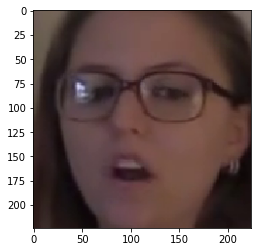

In [9]:
X_batch, y_batch = train_generator[7]

print("Shape of X (features):", X_batch.shape)
print("Shape of y (labels):", y_batch.shape)

import matplotlib.pyplot as plt
plt.imshow(X_batch[0][0])

print(y_batch)

In [10]:
'''
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Create TensorFlow datasets
train_ds = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_types=(tf.float32, tf.int32),
    output_shapes=([None, train_generator.n_frames, *train_generator.input_shape], [None])
)

val_ds = tf.data.Dataset.from_generator(
    lambda: val_generator,
    output_types=(tf.float32, tf.int32),
    output_shapes=([None, val_generator.n_frames, *val_generator.input_shape], [None])
)

# Apply cache and prefetch
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
'''


'\nAUTOTUNE = tf.data.experimental.AUTOTUNE\n\n# Create TensorFlow datasets\ntrain_ds = tf.data.Dataset.from_generator(\n    lambda: train_generator,\n    output_types=(tf.float32, tf.int32),\n    output_shapes=([None, train_generator.n_frames, *train_generator.input_shape], [None])\n)\n\nval_ds = tf.data.Dataset.from_generator(\n    lambda: val_generator,\n    output_types=(tf.float32, tf.int32),\n    output_shapes=([None, val_generator.n_frames, *val_generator.input_shape], [None])\n)\n\n# Apply cache and prefetch\ntrain_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)\nval_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)\n'

In [11]:
import tensorflow as tf
import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout


class Conv2Plus1D(keras.layers.Layer):
  def __init__(self, filters, kernel_size, padding):
    """
      A sequence of convolutional layers that first apply the convolution operation over the
      spatial dimensions, and then the temporal dimension. 
    """
    super().__init__()
    self.seq = keras.Sequential([  
        # Spatial decomposition
        layers.Conv3D(filters=filters,
                      kernel_size=(1, kernel_size[1], kernel_size[2]),
                      padding=padding),
        layers.ReLU(),
        # Temporal decomposition
        layers.Conv3D(filters=filters, 
                      kernel_size=(kernel_size[0], 1, 1),
                      padding=padding),
        layers.ReLU()
        ])

  def call(self, x):
    return self.seq(x)

In [12]:


# Define input shape based on your data
# Assuming input_shape = (frames, height, width, channels)
input_shape = (30, 224, 224, 3)  # Example input shape, adjust to your data

model = models.Sequential([

    Conv2Plus1D(filters=16, kernel_size=(3, 3, 3), padding='valid'),
    layers.MaxPooling3D(pool_size=(1, 2, 2)),

    Conv2Plus1D(filters=32, kernel_size=(3, 3, 3), padding='valid'),
    layers.MaxPooling3D(pool_size=(1, 2, 2)),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  
])

# The input shape is set in the model's first layer
model.build(input_shape=(None, 30, 224, 224, 3))

# Compile the model
model.compile(loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              optimizer='adam',
              metrics=['accuracy'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2_plus1d (Conv2Plus1D)  (None, 28, 222, 222, 16   1232      
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 28, 111, 111, 16   0         
 D)                          )                                   
                                                                 
 conv2_plus1d_1 (Conv2Plus1  (None, 26, 109, 109, 32   7744      
 D)                          )                                   
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 26, 54, 54, 32)    0         
 g3D)                                                            
                                                                 
 flatten (Flatten)           (None, 2426112)          

In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Define the ModelCheckpoint callback to save the best weights
#checkpoint = ModelCheckpoint('EfficientViT.h5', monitor='val_accuracy', save_best_only=True, mode='max')

checkpoint = ModelCheckpoint('3DCNN_4', monitor='val_accuracy', save_best_only=True, mode='max', save_format='tf')


In [14]:
# Fit the model
'''
model_info = model.fit(train_ds, 
                    epochs=5, 
                    steps_per_epoch = len(train_generator),
                    validation_data=val_ds,
                    validation_steps =len(val_generator),
                    callbacks=[reduce_lr, checkpoint])
'''
model_info = model.fit(train_generator, 
                    epochs=5, 
                    steps_per_epoch = len(train_generator),
                    validation_data=val_generator,
                    validation_steps =len(val_generator),
                    callbacks=[reduce_lr, checkpoint])



Epoch 1/5
86/86 [==============================] - ETA: 0s - loss: 1.0667 - accuracy: 0.5209 INFO:tensorflow:Assets written to: 3DCNN_4\assets


INFO:tensorflow:Assets written to: 3DCNN_4\assets


86/86 [==============================] - 3665s 42s/step - loss: 1.0667 - accuracy: 0.5209 - val_loss: 0.6883 - val_accuracy: 0.4667 - lr: 0.0010
Epoch 2/5
86/86 [==============================] - ETA: 0s - loss: 0.6910 - accuracy: 0.5174 INFO:tensorflow:Assets written to: 3DCNN_4\assets


INFO:tensorflow:Assets written to: 3DCNN_4\assets


86/86 [==============================] - 3561s 41s/step - loss: 0.6910 - accuracy: 0.5174 - val_loss: 0.6930 - val_accuracy: 0.5026 - lr: 0.0010
Epoch 3/5
86/86 [==============================] - 3551s 41s/step - loss: 0.6959 - accuracy: 0.5360 - val_loss: 0.6939 - val_accuracy: 0.4718 - lr: 0.0010
Epoch 4/5
86/86 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.5302 INFO:tensorflow:Assets written to: 3DCNN_4\assets


INFO:tensorflow:Assets written to: 3DCNN_4\assets


86/86 [==============================] - 3588s 42s/step - loss: 0.6926 - accuracy: 0.5302 - val_loss: 0.6910 - val_accuracy: 0.5077 - lr: 0.0010
Epoch 5/5
86/86 [==============================] - ETA: 0s - loss: 0.6895 - accuracy: 0.5733 INFO:tensorflow:Assets written to: 3DCNN_4\assets


INFO:tensorflow:Assets written to: 3DCNN_4\assets


86/86 [==============================] - 3567s 41s/step - loss: 0.6895 - accuracy: 0.5733 - val_loss: 0.6629 - val_accuracy: 0.5744 - lr: 0.0010


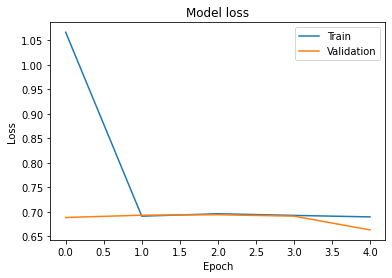

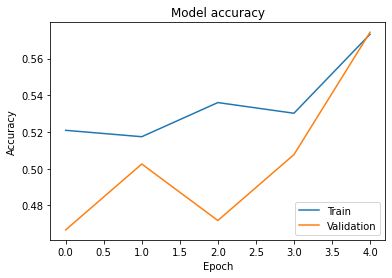

In [15]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training and validation accuracy
plt.plot(model_info.history['accuracy'])
plt.plot(model_info.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()